<h1>Full Sessionn Classifiers</h3>

<h2>Load Data</h2>

<h2>Mean Values per Respondent</h2>

In [1]:
import pandas as pd

# Load data
file_path = './datasets/Publication Dataset June 2024.csv'
mean_data_from_file = df = pd.read_csv(file_path, low_memory=False)

mean_data_from_file.head()

,Unnamed: 0,Respondent,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,...,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Blink,BlinkRate,Grade
0,0,1,1.163229,0.254944,0.392873,1.440810,6.499545,0.268705,0.674075,22.516467,...,10.318576,1.194926,28.449007,0.893259,9.275257,0.482011,2.466853,0.010581,19.300548,100.0
1,1,2,1.544074,2.332416,0.481205,1.416028,0.570981,0.424949,1.505524,39.192416,...,7.177666,1.292952,55.497770,0.257819,0.701962,2.881101,0.724063,0.006212,14.053208,50.0
2,2,3,1.858315,0.574013,0.342346,2.387849,1.129676,0.135473,3.017969,35.443592,...,3.241353,0.229480,54.457716,0.036332,1.667142,1.828333,0.516913,0.002636,4.622152,55.0
3,3,4,1.167415,2.292135,0.699927,0.777726,3.815992,0.357908,0.299903,44.031246,...,10.321261,3.834506,63.257099,0.506664,4.671887,5.000366,2.341052,0.011138,19.542128,75.0
4,4,5,0.552830,3.125797,0.089759,0.258266,4.016242,1.487197,0.075457,16.701202,...,11.348795,2.433070,6.334755,0.728067,6.761394,9.708484,1.967552,0.005759,10.581087,65.0


In [2]:
# Add a new column to the combined_data_with_grades dataframe that indicates whether the grade is above or below 55
mean_data_from_file['Grade Group'] = mean_data_from_file['Grade'].apply(lambda x: 'Above 55' if x > 55 else 'Below 55')


<h3>Classifiers</h3>

<h3>Random Forest for Grade Group</h3>

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# List of columns to use as features
features_list = ['Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'BlinkRate', 'Sadness']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']  

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier directly
rf_classifier = RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42, class_weight= 'balanced', n_jobs=2)

# Fit the RandomForestClassifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the RandomForestClassifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [4]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
import numpy as np

# Define Leave-One-Out cross-validator
loo = LeaveOneOut()

# Perform leave-one-out cross-validation and calculate accuracy
scores = cross_val_score(rf_classifier, X, y, cv=loo, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

Accuracy scores for each fold: [1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 0.875


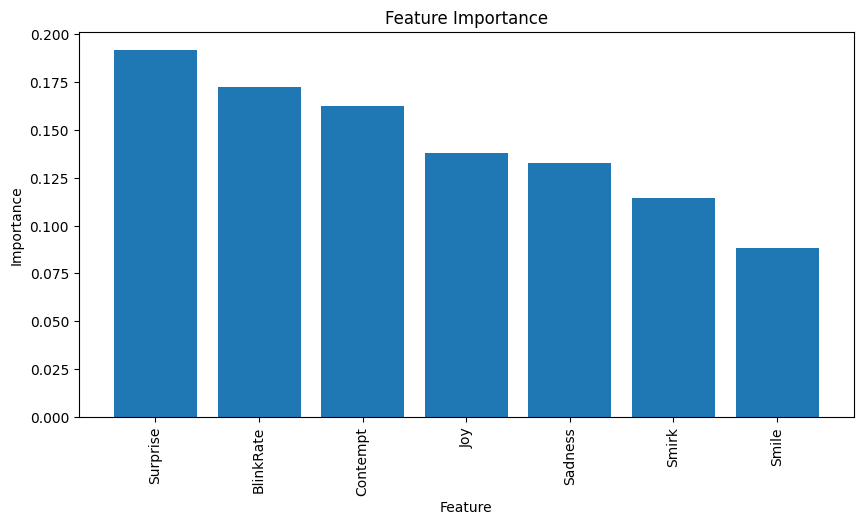

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the RandomForestClassifier
importances = rf_classifier.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features_list[i] for i in indices]

# Create the plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


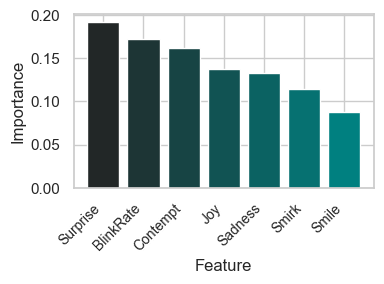

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming rf_classifier and features_list are already defined and valid
# Get feature importances from the RandomForestClassifier
importances = rf_classifier.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features_list[i] for i in indices]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

light_teal = sns.dark_palette("teal", n_colors=7)  # Generates a palette from dark to light

# Create a muted color palette for academic publication
palette = sns.color_palette(light_teal) 

# Create the plot
plt.figure(figsize=(4, 3))  # Increased width for better spacing
bars = plt.bar(range(len(importances)), importances[indices], align='center', color=palette)


# Customize x-axis
plt.xticks(range(len(importances)), names, rotation=45, ha='right', fontsize=10)  # Rotate labels for better readability
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)

# Improve layout to avoid clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()


<h3>Decision Tree Classifier</h3>

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, LeaveOneOut
import numpy as np

# List of columns to use as features
features_list = ['Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Initialize the model directly with DecisionTreeClassifier, without StandardScaler
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Define Leave-One-Out cross-validator
loo = LeaveOneOut()

# Perform leave-one-out cross-validation and calculate accuracy
scores = cross_val_score(dt_classifier, X, y, cv=loo, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")
print(f"Standard diviation cross-validation accuracy: {np.std(scores)}")

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy scores for each fold: [1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 0.625
Standard diviation cross-validation accuracy: 0.4841229182759271
Classification Report:
               precision    recall  f1-score   support

    Above 55       1.00      0.50      0.67         2
    Below 55       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [8]:
from sklearn.tree import export_text

tree_rules = export_text(dt_classifier, feature_names=['Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate'])
print(tree_rules)

|--- Surprise <= 0.43
|   |--- class: Above 55
|--- Surprise >  0.43
|   |--- Contempt <= 0.50
|   |   |--- class: Above 55
|   |--- Contempt >  0.50
|   |   |--- class: Below 55



<h3>Naive Bayes</h3>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# List of columns to use as features
features_list = [ 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fitting the model on the training data
gnb.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gnb.predict(X_test)

# Define Leave-One-Out cross-validator
loo = LeaveOneOut()

# Perform leave-one-out cross-validation and calculate accuracy
scores = cross_val_score(gnb, X, y, cv=loo, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")
print(f"Standard diviation cross-validation accuracy: {np.std(scores)}")

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy scores for each fold: [1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.]
Mean cross-validation accuracy: 0.625
Standard diviation cross-validation accuracy: 0.4841229182759271
Classification Report:
               precision    recall  f1-score   support

    Above 55       1.00      1.00      1.00         2
    Below 55       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

